In [10]:
'''读取文件'''
import sdf_helper as sh
import numpy as np
import matplotlib.pyplot as plt
import os

# 设置全局字体为 Times New Roman 和字号
plt.rcParams.update({
    'font.family': 'Arial',
    'font.size': 20,
    'axes.labelsize': 20,
    'axes.titlesize': 20,
    'xtick.labelsize': 18,
    'ytick.labelsize': 18,
    'legend.fontsize': 18,
    'mathtext.fontset': 'custom',
    'mathtext.rm': 'Arial',
    'mathtext.it': 'Arial:italic',
    'mathtext.bf': 'Arial:bold',
    'xtick.direction': 'in',  # X轴刻度向内
    'ytick.direction': 'in',  # Y轴刻度向内
})

# 配色，来自你的色值
color1 = '#ff7f0e'  # 橙色，能量密度
color2 = '#1f77b4'    # 蓝色，方差

In [2]:
def load_ne_sum(base_path, file_index=18, file_prefix='density', file_suffix='.sdf'):
    file_name = f"{file_prefix}{file_index:04d}{file_suffix}"
    file_path = os.path.join(base_path, file_name)

    # 读取数据
    den_crit = 0.17419597124e28
    data = sh.getdata(file_path)
    ne = data.Derived_Number_Density_Photon.data / den_crit
    E = data.Derived_Average_Particle_Energy_Photon.data
    ne = ne * E

    x = data.Grid_Grid_mid.data[0] / 1e-6
    y = data.Grid_Grid_mid.data[1] / 1e-6
    z = data.Grid_Grid_mid.data[2] / 1e-6

    # 截取指定 y/z 区间
    y_range = (-2, 2)
    z_range = (-2, 2)
    y_idx = np.where((y >= y_range[0]) & (y <= y_range[1]))[0]
    z_idx = np.where((z >= z_range[0]) & (z <= z_range[1]))[0]

    y_start, y_end = y_idx[0], y_idx[-1] + 1
    z_start, z_end = z_idx[0], z_idx[-1] + 1

    ne_sum = np.sum(ne[:, y_start:y_end, z_start:z_end], axis=(1, 2))
    return x, ne_sum

In [6]:
# 读取无磁场数据
base_path1 = '/media/lan/4248e56e-6d9a-4026-afad-e8b1d59ceab0/epoch-set2/epoch3d/ju2024abx0'
x1, ne1 = load_ne_sum(base_path1, file_index=18)

# 读取有磁场数据
base_path2 = '/media/lan/4248e56e-6d9a-4026-afad-e8b1d59ceab0/epoch-set2/epoch3d/ju2024abx25'
x2, ne2 = load_ne_sum(base_path2, file_index=18)

Reading file /media/lan/4248e56e-6d9a-4026-afad-e8b1d59ceab0/epoch-set2/epoch3d/ju2024abx0/density0018.sdf
t() = time
x(1501, 1001, 1001) = grid
y(1501, 1001, 1001) = grid
z(1501, 1001, 1001) = grid
xc(1500, 1000, 1000) = grid_mid
yc(1500, 1000, 1000) = grid_mid
zc(1500, 1000, 1000) = grid_mid
Reading file /media/lan/4248e56e-6d9a-4026-afad-e8b1d59ceab0/epoch-set2/epoch3d/ju2024abx25/density0018.sdf
t() = time
x(1501, 1001, 1001) = grid
y(1501, 1001, 1001) = grid
z(1501, 1001, 1001) = grid
xc(1500, 1000, 1000) = grid_mid
yc(1500, 1000, 1000) = grid_mid
zc(1500, 1000, 1000) = grid_mid


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


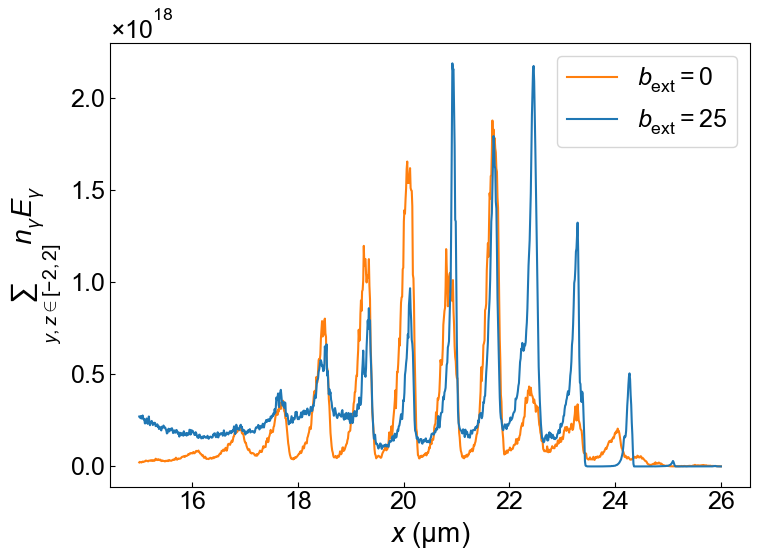

In [12]:
# ---- 限制 x 范围 ----
x_min, x_max = 15, 26
mask1 = (x1 >= x_min) & (x1 <= x_max)
mask2 = (x2 >= x_min) & (x2 <= x_max)

den_crit = 0.17419597124e28

# ---- 绘图 ----
fig, ax1 = plt.subplots(figsize=(8, 6))

ax1.plot(x1[mask1], ne1[mask1]*den_crit, color=color1, label=r'$b_\text{ext}=0$')
ax1.plot(x2[mask2], ne2[mask2]*den_crit, color=color2, label=r'$b_\text{ext}=25$') #linestyle='--'

ax1.set_xlabel(r'$x\ (\mathrm{μm})$')
# ax1.set_ylabel(r'$\sum_{y,z\in[-2,2]} n_\gamma/n_c$ (a.u.)')
ax1.set_ylabel(r'$\sum_{y,z\in[-2,2]} n_\gamma E_\gamma$')

# 科学计数格式
from matplotlib.ticker import ScalarFormatter
ax1.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax1.ticklabel_format(axis='y', style='sci', scilimits=(0, 0))

ax1.legend()
fig.tight_layout()
plt.savefig('/media/lan/Lexar/EPOCH代码/论文代码/论文2/outfig/fig3.eps', format='eps')  # 保存为EPS格式
plt.savefig('/media/lan/Lexar/EPOCH代码/论文代码/论文2/outfig/fig3.pdf', format='pdf')  # 保存为EPS格式
plt.show()

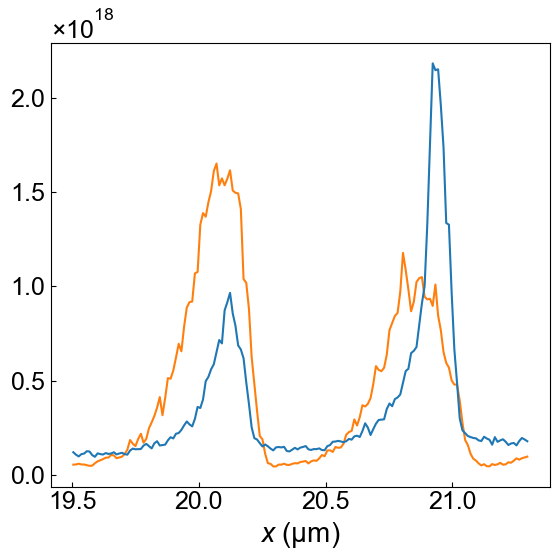

In [13]:
# ---- 限制 x 范围 ----
x_min, x_max = 19.5, 21.3
mask1 = (x1 >= x_min) & (x1 <= x_max)
mask2 = (x2 >= x_min) & (x2 <= x_max)

den_crit = 0.17419597124e28

# ---- 绘图 ----
fig, ax1 = plt.subplots(figsize=(6, 6))

ax1.plot(x1[mask1], ne1[mask1]*den_crit, color=color1, label=r'$b_\text{ext}=0$')
ax1.plot(x2[mask2], ne2[mask2]*den_crit, color=color2, label=r'$b_\text{ext}=25$') #linestyle='--'

ax1.set_xlabel(r'$x\ (\mathrm{μm})$')
# ax1.set_ylabel(r'$\sum_{y,z\in[-2,2]} n_\gamma/n_c$ (a.u.)')
# ax1.set_ylabel(r'$\sum_{y,z\in[-2,2]} n_\gamma E_\gamma$')

# 科学计数格式
from matplotlib.ticker import ScalarFormatter
ax1.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax1.ticklabel_format(axis='y', style='sci', scilimits=(0, 0))

# ax1.legend()
fig.tight_layout()
plt.savefig('/media/lan/Lexar/EPOCH代码/论文代码/论文2/outfig/fig3_小图.eps', format='eps')  # 保存为EPS格式
plt.savefig('/media/lan/Lexar/EPOCH代码/论文代码/论文2/outfig/fig3_小图.pdf', format='pdf')  # 保存为EPS格式
plt.show()